In [1]:
from periodicLatticeSolver import PeriodicLatticeSolver
from minimizer import Minimizer
import numpy as np
from FloorPlanClass import FloorPlan
from plotter import Plotter
PLS = PeriodicLatticeSolver(200, .02, axis='both')
PLS.add_Injector(.45,.002,10/200)

L1 = PLS.Variable('L1', varMin=.01, varMax=.5)
L2= PLS.Variable('L2', varMin=.01, varMax=.5)
L3 =PLS.Variable('L3', varMin=.01, varMax=.5)
L4= PLS.Variable('L4', varMin=.01, varMax=.5)

Bp1 = .45
Bp2 = .45
Bp3 = .45
Bp4 = .45

rp1 = PLS.Variable('rp1', varMin=.01, varMax=.03)
rp2 = PLS.Variable('rp2', varMin=.01, varMax=.03)
rp3 = PLS.Variable('rp3', varMin=.01, varMax=.03)
rp4 = PLS.Variable('rp4', varMin=.01, varMax=.03)

r0=PLS.Variable('r0',varMin=1,varMax=1.3)
TL1=PLS.Variable('TL1',varMin=.5,varMax=1.5)
TL2=PLS.Variable('TL2',varMin=.5,varMax=1.5)


PLS.set_Track_Length(TL1=TL1,TL2=TL2)
PLS.begin_Lattice()

PLS.add_Bend(None, r0, .45)
PLS.add_Drift(L=.03)
PLS.add_Lens(L4, Bp4, rp4)
PLS.add_Drift()
PLS.add_Combiner()
PLS.add_Drift()
PLS.add_Lens(L1, Bp1,rp1)
PLS.add_Drift(L=.03)
PLS.add_Bend(None, r0, .45)
PLS.add_Drift(L=.03)
PLS.add_Lens(L2, Bp2, rp2)
PLS.add_Drift()
PLS.add_Lens(L3, Bp3, rp3)
PLS.add_Drift(L=.03)
PLS.end_Lattice()

Lattice model completed


100%|██████████| 20000/20000 [4:55:56<00:00,  1.13it/s]


minCost for each thread:  [1.1167457  0.99236082 1.01771869 1.27024709 1.01113794 1.08131312
 1.12187106 1.01376174 0.96760681 1.05690017 1.02528647 0.95661231
 0.99683124 0.97668416 1.00568456 0.95617313 0.98165563 0.94005625
 0.97837719 0.95884275 0.9711459  0.98611851 1.03507009 1.03203889
 0.99691577 0.96201443 1.02915766 1.00973405 1.01604016 1.03322673
 0.95917276 0.94923949]


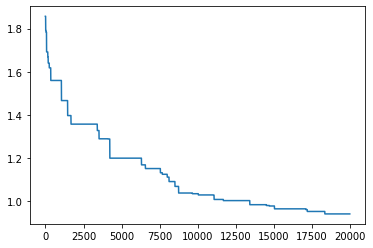

[0.3578503  0.46373885 0.14800994 0.04441682 0.02973793 0.03
 0.02678494 0.01002477 1.3        0.71734062 0.56092933 0.19966457
 0.12314971] 0.9400562466000609
[0.3578503  0.46373885 0.14800994 0.04441682 0.02973793 0.03
 0.02678494 0.01002477 1.3        0.71734062 0.56092933 0.19966457
 0.12314971] 0.9400562466000609
done
Total time 295 minutes and 59 seconds


In [6]:
minimizer=Minimizer(PLS)
minimizer.find_Global_Min(mut=.75, crossPop=.7, iterations=20000, popPerDim=20,strategy='current-to-best/1')

[0.3579 0.4637 0.148  0.0444 0.0297 0.03   0.0268 0.01   1.3    0.7173
 0.5609]


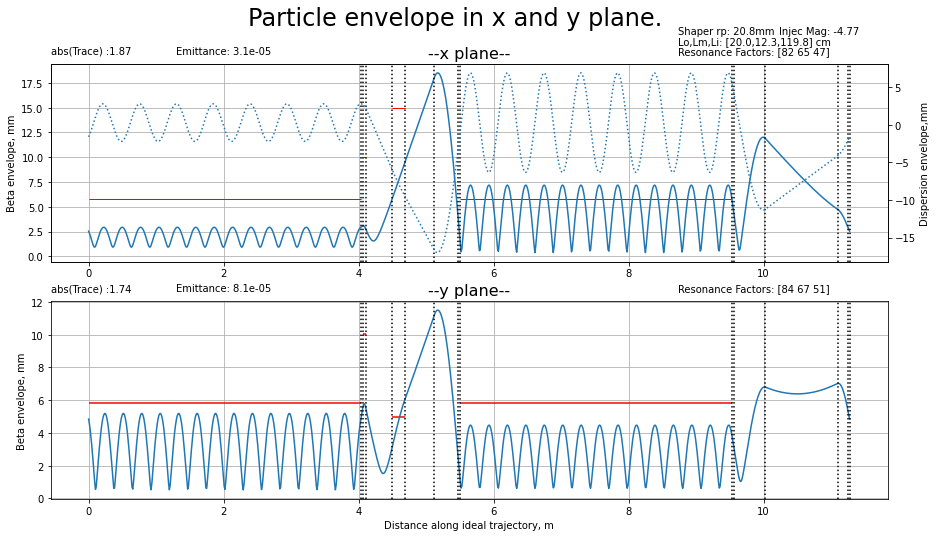

In [7]:
plotter=Plotter(PLS)
plotter.plot(sol=minimizer.sol)

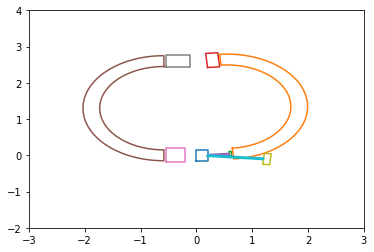

4.0

In [4]:
floorPlan=FloorPlan(PLS)
floorPlan.show_Floor_Plan(sol=minimizer.sol)
floorPlan.calculate_Cost()